In [1]:
import pandas as pd

df = pd.read_csv('iris.csv')
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [5]:
df['variety'].unique() # 種類列の値を確認

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
variety = df['variety'].unique() # array型の特定要素を参照

variety[0]

'Setosa'

In [7]:
df['variety'].value_counts() # value_countsメソッドでデータの出現回数をカウント

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [8]:
df.tail(3) # 末尾３件を表示

,sepal.length,sepal.width,petal.length,petal.width,variety
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [9]:
df.isnull() # 各マスが欠損値かどうか調べる

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
df.isnull().any(axis=0) # anyメソッドにより列単位で欠損値が存在するか調べる

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
dtype: bool

In [11]:
df.sum() #v 各列の合計値を計算

sepal.length                                                876.5
sepal.width                                                 458.6
petal.length                                                563.7
petal.width                                                 179.9
variety         SetosaSetosaSetosaSetosaSetosaSetosaSetosaSeto...
dtype: object

In [12]:
tmp = df.isnull() # 各列に欠損値があるかどうか集計

tmp.sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [14]:
df2 = df.dropna(how = 'any', axis = 0) # dropnaメソッドで欠損地を含む行/列を削除する

df2.tail(3) # 欠損値の存在確認

,sepal.length,sepal.width,petal.length,petal.width,variety
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [16]:
df.isnull().any(axis = 0) # 削除元のデータフレームの確認

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
dtype: bool

df.mean()

In [17]:
df.mean() # 数値列の各平均値を計算

/var/folders/pl/l83vr0j523j0hp3dngvsrhqc0000gn/T/ipykernel_12912/1161681643.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean() # 数値列の各平均値を計算


sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64

In [18]:
df.std() # 各列の標準偏差

/var/folders/pl/l83vr0j523j0hp3dngvsrhqc0000gn/T/ipykernel_12912/64263293.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std() # 各列の標準偏差


sepal.length    0.828066
sepal.width     0.435866
petal.length    1.765298
petal.width     0.762238
dtype: float64

In [24]:
from sklearn import tree

xcol = ['sepal.length','sepal.width','petal.length','petal.width']
x = df2[xcol]
t = df2['variety']

In [25]:
model = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0) # モデルの作成

In [26]:
model.fit(x, t)

model.score(x, t)

0.96

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.3, random_state = 0)
# x_train, ytrain が学習に利用する訓練データ
# x_tes, y_test が検証に利用するテストデータ

In [32]:
print(x_train.shape) # x_train の行数・列数を表示
print(x_test.shape) # x_test の行数・列数を表示

(105, 4)
(45, 4)


In [33]:
model.fit(x_train, y_train) # 訓練データで再学習

model.score(x_test, y_test) # テストデータの予測結果と実際の答えが合致する正解率を計算

0.9111111111111111

In [34]:
import pickle

with open('irismodel.pkl', 'wb') as f: # モデルを保存
    pickle.dump(model,f)

In [35]:
model.tree_.feature # 分岐条件の列を決める

array([ 3, -2,  2, -2, -2], dtype=int64)

In [36]:
model.tree_.threshold # 条件分岐の閾値を含む配列を返す

array([ 0.75      , -2.        ,  4.95000005, -2.        , -2.        ])

In [37]:
print(model.tree_.value[1]) # ノード番号1に到達した時
print(model.tree_.value[3]) # ノード番号3に到達した時
print(model.tree_.value[4]) # ノード番号4に到達した時

[[34.  0.  0.]]
[[ 0. 31.  3.]]
[[ 0.  1. 36.]]


In [38]:
model.classes_ # アヤメの種類とグループ番号の対応

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

[Text(0.4, 0.8333333333333334, 'petal.width <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'petal.length <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

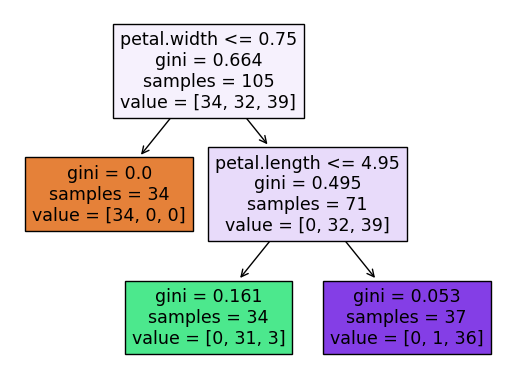

In [39]:
x_train.columns = ['sepal.length','sepal.width','petal.length','petal.width']

from sklearn.tree import plot_tree

plot_tree(model, feature_names = x_train.columns, filled = True)

In [40]:
df = pd.read_csv('ex2.csv')

df.head(3)

,x0,x1,x2,x3,target
0,-1.244674,1.452124,-1.184385,-0.839169,1
1,-1.662920,-0.375804,-0.956673,0.380114,0
2,-1.926513,NaN,-1.203904,-0.728801,1


In [41]:
df.shape

(100, 5)

In [43]:
df['target'].unique()

array([1, 0])

In [45]:
df['target'].value_counts()

1    80
0    20
Name: target, dtype: int64

In [46]:
df.isnull()

,x0,x1,x2,x3,target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [47]:
df.isnull().any(axis = 0)

x0        False
x1         True
x2         True
x3        False
target    False
dtype: bool

In [48]:
tmp = df.isnull()

tmp.sum()

x0        0
x1        1
x2        1
x3        0
target    0
dtype: int64

In [49]:
df2 = df.fillna(df.median())

In [51]:
xcol = ['x0','x1','x2','x3']

x = df2[xcol]
t = df2['target']

In [52]:
x_train, x_test,  y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [53]:
model = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)

In [54]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [55]:
model.score(x_test, y_test)

0.95

In [56]:
newdata = [[1.56, 0.23, -1.1, 2.8]]

answer = model.predict(newdata)
answer

/Users/kawanodaiya/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])